<a href="https://colab.research.google.com/github/armandossrecife/teste/blob/main/Scripts_de_extra%C3%A7%C3%A3o_de_dados_MSR_Apache_Kafka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/mining-software-repositories/treinamento/blob/main/handson3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

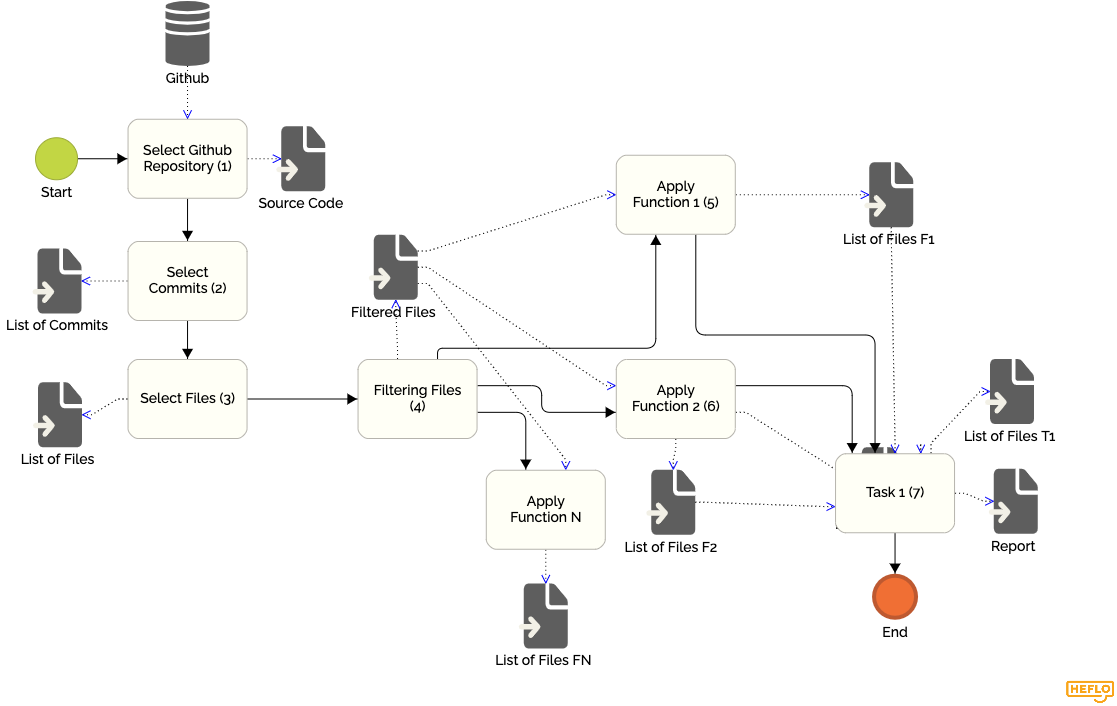

# Set Environment

## Install modules

In [1]:
# Instala modulos que serão usados
# https://pydriller.readthedocs.io/en/latest/
!pip install pydriller

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 184 kB 8.0 MB/s 
     |████████████████████████████████| 66 kB 4.3 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 


## Install OS packages

In [2]:
#For google colab
!sudo apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (96.5 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure:

## Imports

In [3]:
from pydriller import Repository
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go

# 1. Select Github repository



In [4]:
!git clone https://github.com/apache/kafka.git

Cloning into 'kafka'...
remote: Enumerating objects: 315792, done.
remote: Counting objects: 100% (302/302), done.
remote: Compressing objects: 100% (193/193), done.
remote: Total 315792 (delta 84), reused 223 (delta 36), pack-reused 315490
Receiving objects: 100% (315792/315792), 147.09 MiB | 22.80 MiB/s, done.
Resolving deltas: 100% (152490/152490), done.


In [5]:
# Clona o repositorio treinamento para acessar as libs proprietárias
!git clone https://github.com/mining-software-repositories/treinamento.git

Cloning into 'treinamento'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 81 (delta 41), reused 31 (delta 11), pack-reused 0
Unpacking objects: 100% (81/81), done.


In [6]:
# Define uma variável para representar os repositórios que serão trabalhados
repositorio1 = "kafka"


# Fuctions

In [7]:
def get_list_of_files_and_directories_updated(repositorio):
  list_of_files_and_directories = !cd {repositorio} && tree -i -f
  temp = f'{repositorio}/'
  result = [each.replace('./', temp) for each in list_of_files_and_directories]
  return result

In [9]:
def get_list_of_files_and_directories_src(repositorio, folder_src='src', folder_java='streams/src/main/java/'):
  # Escolhe o diretorio do source java
  # Lista apenas arquivos e diretorios do src/main/java
  result = []

  for item in get_list_of_files_and_directories_updated(repositorio):
    if folder_src in item:
      if folder_java in item:
        result.append(item)
  return result

In [10]:
def get_list_of_files_and_directories_src2(repositorio, folder_src='streams/src/main/java/'):
  # Escolhe o diretorio do source java
  # Lista apenas arquivos e diretorios do src/main/java
  result = []
  for item in get_list_of_files_and_directories_updated(repositorio):
    if folder_src in item:
      result.append(item)
  return result

In [11]:
def get_list_locs_of_files(repositorio):
  # Cria um arquivo contendo a quantidade de LOC por arquivo
  !find {repositorio} -name *.java | xargs wc -l > locarquivosjava.txt
  list_locs_of_files = !cat locarquivosjava.txt

  # Cria uma lista com elementos que representam o LOC e o arquivo
  # (Loc, arquivo)
  result = []
  for each in list_locs_of_files:
    elementos = each.split(' ') 
    item = elementos[-2], elementos[-1]
    result.append(item)
  return result

In [12]:
def get_dict_java_frequency_commits(dict_frequency_files_commits):
  dict_java_frequency_commits = {}
  for file, frequency in dict_frequency_files_commits.items():
    if '.java' in file:
      dict_java_frequency_commits[file] = frequency
  return dict_java_frequency_commits

In [13]:
def get_dict_java_lines_modified(dict_lines_modified_in_files):
  dict_java_lines_modified = {}
  for file, lines_modified in dict_lines_modified_in_files.items():
    if '.java' in file:
      dict_java_lines_modified[file] = lines_modified
  return dict_java_lines_modified

In [14]:
def convert_dict_java_frequency_to_dataframe(dict_java_frequency_commits):
  # Converte o dicionário dict_java_frequency_commits em um dataframe
  df_java_frequency_commits = pd.DataFrame(dict_java_frequency_commits.items(), columns=['File', 'Frequency'])
  return df_java_frequency_commits

In [15]:
def convert_dict_java_lines_modified_to_dataframe(dict_java_lines_modified):
  # Converte o dicionário dict_java_lines_modified em um dataframe
  df_java_lines_modified = pd.DataFrame(dict_java_lines_modified.items(), columns=['File', 'lines_modified'])
  return df_java_lines_modified

In [16]:
def merge_dataframes_java_frequency(df_java_frequency_commits, df_java_lines_modified):
  # Faz o merge das informações para criar um dataframe contendo o arquivo, 
  # a frequência de Commits e Linhas Modificadas de cada arquivo ao longo do tempo
  df = df_java_frequency_commits[['File', 'Frequency']]
  df['lines_modified'] = df_java_lines_modified['lines_modified']
  return df

In [17]:
def generate_sccater_plot(df_fc_ml, repositorio=None):
  plt.style.use('ggplot')
  plt.figure(figsize=(12,8))
  sns.scatterplot(data=df_fc_ml, x='lines_modified', y='Frequency')

  titulo_temp = f'{repositorio} - LoCs Modifications x Files Occurrence in Commits'
  abbr={'titulo':titulo_temp, 'lines_modified':'LoCs Modifications', 'Frequency':'Files Occurrence in Commits'}

  plt.title(f"Analysis of {repositorio} Repository : {abbr['lines_modified']} x {abbr['Frequency']}")
  plt.xlabel(abbr['lines_modified'])
  plt.ylabel(abbr['Frequency'])
          
  for i in range(df_fc_ml.shape[0]): 
    plt.text(df_fc_ml.lines_modified[i], y=df_fc_ml.Frequency[i], s=df_fc_ml.File[i], alpha=0.8, fontsize=8)

  plt.show()

In [18]:
def generate_sccater_plot_2(df_fc_ml, repositorio=None):
  # array de complexidade ciclomatica
  array_cc = np.random.randint(1, 300, size=300)
  # Add traces
  fig = go.Figure(data=go.Scatter(
                      x=df_fc_ml.lines_modified, 
                      y=df_fc_ml.Frequency,
                      mode='markers',
                      name='markers',
                      customdata=df_fc_ml.File,
                      hovertext=df_fc_ml.File, 
                      marker=dict(size=8, color=array_cc, colorscale='Blues', showscale=True, colorbar={"title": 'CC'})
                      )
                    )
  
  titulo_temp = f'{repositorio} - LoCs Modifications x Files Occurrence in Commits'

  fig.update_layout({"title_text": titulo_temp},     
                    width=1000,
                    height=600
                    )
  fig.update_xaxes(
          title_text = "LoC Modifications",
          title_font = {"size": 10}
          )
  fig.update_yaxes(
          title_text = "Commit Frequency",
          title_font = {"size": 10}
          )

  fig.show()

In [19]:
def generate_box_plot_frequency(df_fc_ml):
  s_boxplot_fc = df_fc_ml['Frequency']
  df_boxplot_fc = s_boxplot_fc.to_frame(name='Frequency')
  df_boxplot_fc['File'] = 'File'
  plt.figure(figsize=(6,4))
  sns.boxplot(x='File', y='Frequency', data=df_boxplot_fc)
  return df_boxplot_fc

In [20]:
def get_quartiles_frequency(df_boxplot_fc):
  fc_q1 = np.percentile(df_boxplot_fc.Frequency , [25])
  fc_q2 = np.percentile(df_boxplot_fc.Frequency , [50])
  fc_q3 = np.percentile(df_boxplot_fc.Frequency , [75])
  fc_q4 = np.percentile(df_boxplot_fc.Frequency , [100])
  return fc_q1, fc_q2, fc_q3, fc_q4

In [21]:
def generate_box_plot_lines_modified(df_fc_ml):
  s_boxplot_lm = df_fc_ml['lines_modified']
  df_boxplot_lm = s_boxplot_lm.to_frame(name='lines_modified')
  df_boxplot_lm['File'] = 'File'
  df_boxplot_lm
  plt.figure(figsize=(6,4))
  # Constroi o Boxsplot excluindo arquivos que apareceram em menos de 10 commits
  sns.boxplot(x='File', y='lines_modified', data=df_boxplot_lm)
  return df_boxplot_lm

In [22]:
def get_quartiles_lines_modified(df_boxplot_lm):
  lm_q1 = np.percentile(df_boxplot_lm.lines_modified , [25])
  lm_q2 = np.percentile(df_boxplot_lm.lines_modified , [50])
  lm_q3 = np.percentile(df_boxplot_lm.lines_modified , [75])
  lm_q4 = np.percentile(df_boxplot_lm.lines_modified , [100])
  return lm_q1, lm_q2, lm_q3, lm_q4

In [53]:
def cria_popula_arquivo(nome_arquivo, lista):
  try:
    file = open(nome_arquivo, 'w')
    for each in lista:
      each = str(each) + '\n'
      file.write(each)
    file.close()
  except Exception as ex:
    print(f'Erro ao criar e popular o arquivo {nome_arquivo}: {ex.message}')

In [65]:
def cria_popula_arquivo2(nome_arquivo, dicionario):
  try:
    file = open(nome_arquivo, 'w')
    lista = list()
    for commit, lista_files in dicionario.items(): 
	    commit = str(commit)
	    lista = [file.filename for file in lista_files]
	    elemento = commit + ';' + str(lista) + '\n'
	    file.write(elemento)
    file.close()
  except Exception as ex:
    print(f'Erro ao criar e popular o arquivo {nome_arquivo}: {ex.message}')

In [69]:
def cria_popula_arquivo3(nome_arquivo, dicionario):
  try:
    file = open(nome_arquivo, 'w')
    for k, v in dicionario.items():
      k = str(k)
      v = str(v)
      elemento = k + ';' + v + '\n'
      file.write(elemento)
    file.close()
  except Exception as ex:
    print(f'Erro ao criar e popular o arquivo {nome_arquivo}: {ex.message}')

# Directory and File Analyzer

In [23]:
# Substitui o . pelo repositorio/
list_of_files_and_directories = get_list_of_files_and_directories_updated(repositorio1)


In [55]:
cria_popula_arquivo('kafka_files_and_directories.txt', list_of_files_and_directories)

In [24]:
# Escolhe o diretorio do source java
# Lista apenas arquivos e diretorios do src/main/java
list_of_files_and_directories_src = get_list_of_files_and_directories_src2(repositorio1)


In [56]:
cria_popula_arquivo('kafka_files_and_directories_src.txt', list_of_files_and_directories_src)

In [25]:
# Cria um arquivo contendo a quantidade de LOC por arquivo
list_locs_of_files_updated = get_list_locs_of_files(repositorio1)


In [58]:
cria_popula_arquivo('kafka_locs_of_files_updated.txt', list_locs_of_files_updated)

# Commits and Files Analyzer

In [26]:
# Importa funcoes pre-definidas para manipular repositorios usando o Pydriller
import treinamento.utils.msr as msr

## 2. Select commits

In [27]:
# Lista todos os commits de um repositorio
list_commits_promocity = msr.list_all_commits(repositorio1)

In [59]:
cria_popula_arquivo('kafka_list_commits_promocity.txt', list_commits_promocity)

In [29]:
from pydriller import Repository, Git

def list_from_hash_commits(path_repository, list_hash_commits):
  """
  List all commits in the repository
  @param: str path_repository: repositorio que sera analisado
  @return a list of pydryiller commits
  """
  commits = []
  for commit in Repository(path_repository, only_commits=list_hash_commits).traverse_commits():
      commits.append(commit)
  return commits

def list_all_modified_files_from_hash_commits(path_repository, list_hash_commits):
  """
  List all modified files in all commits in the repository
  @return a dictionary where the each key contains the hash of a commit 
  and the value associated contains a list of pydriller modified_file
  of this commit
  """
  modified_files = {}
  for commit in list_from_hash_commits(path_repository, list_hash_commits):
      modified_files[commit.hash] = commit.modified_files
  return modified_files

## 3. Select files from commits

In [31]:
# Lista todos os arquivos modificados em cada commit
dict_modified_files_promocity = msr.list_all_modified_files_in_commits(repositorio1)

In [66]:
cria_popula_arquivo2('kafka_dict_modified_files_promocity.txt', dict_modified_files_promocity)

In [32]:
# 5. Lista a frequência dos arquivos nos commits
dict_frequency_files_commits = msr.get_files_frequency_in_commits(repositorio1)

In [71]:
cria_popula_arquivo3('kafka_dict_frequency_files_commits.txt', dict_frequency_files_commits)

In [33]:
# 6. Lista a Quantidade de Linhas de Código Modificadas em cada Arquivo
dict_lines_modified_in_files = msr.get_number_of_lines_of_code_changes_in_commits(repositorio1)

In [72]:
cria_popula_arquivo3('kafka_dict_lines_modified_in_files.txt', dict_lines_modified_in_files)

## 4. Select only java files


In [35]:
dict_java_frequency_commits = get_dict_java_frequency_commits(dict_frequency_files_commits)


In [74]:
cria_popula_arquivo3('kafka_dict_java_frequency_commits.txt', dict_java_frequency_commits)

In [36]:
dict_java_lines_modified = get_dict_java_lines_modified(dict_lines_modified_in_files)


In [75]:
cria_popula_arquivo3('kafka_dict_java_lines_modified.txt', dict_java_lines_modified)

# 7. Task Analyzer

Faz a análise entre Frequência de Commits dos Arquivos e Linhas Modificadas de cada arquivo ao longo do tempo

In [37]:
# Converte o dicionário dict_java_frequency_commits em um dataframe
df_java_frequency_commits = convert_dict_java_frequency_to_dataframe(dict_java_frequency_commits)


In [38]:
# Converte o dicionário dict_java_lines_modified em um dataframe
df_java_lines_modified = convert_dict_java_lines_modified_to_dataframe(dict_java_lines_modified)


## Promocity

In [39]:
# Faz o merge das informações para criar um dataframe contendo o arquivo, a frequência de Commits e Linhas Modificadas de cada arquivo ao longo do tempo
df_fc_ml = merge_dataframes_java_frequency(df_java_frequency_commits, df_java_lines_modified)
df_fc_ml

,File,Frequency,lines_modified
0,KafkaETLContext.java,17,730
1,KafkaETLInputFormat.java,5,165
2,KafkaETLJob.java,5,348
3,KafkaETLKey.java,5,212
4,KafkaETLRecordReader.java,4,368
...,...,...,...
4114,RecordValidationException.java,1,41
4115,LogDirFailureChannel.java,1,77
4116,OffsetMap.java,1,33
4117,SkimpyOffsetMap.java,1,242


In [76]:
df_fc_ml.to_csv('kafka_df_fc_ml.csv')

# Results

## Scatter plot Linhas Modificadas x Frequencia dos Arquivos nos Commits

### Promocity

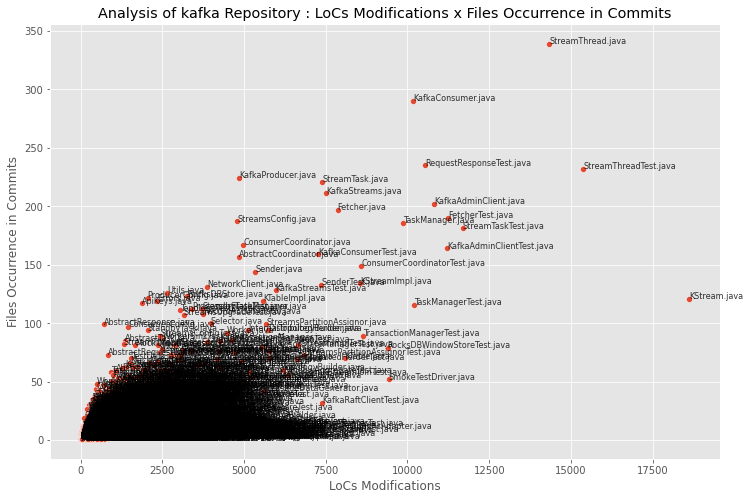

In [40]:
generate_sccater_plot(df_fc_ml, repositorio1)

### Outros scatter plots

In [41]:
generate_sccater_plot_2(df_fc_ml, repositorio1)

## Distribuição de Quartis para Frequência de Commits

### Promocity

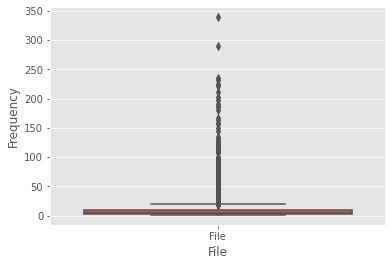

In [42]:
df_boxplot_fc = generate_box_plot_frequency(df_fc_ml)

In [43]:
fc_q1, fc_q2, fc_q3, fc_q4 = get_quartiles_frequency(df_boxplot_fc)
print(f'Quartis da Frequencia de Commits Q1: {fc_q1}, Q2: {fc_q2}, Q3: {fc_q3}, Q4: {fc_q4}')

Quartis da Frequencia de Commits Q1: [2.], Q2: [4.], Q3: [9.], Q4: [339.]


## Distribuição de Quartis para Linhas Modificadas ao longo do tempo

### Promocity

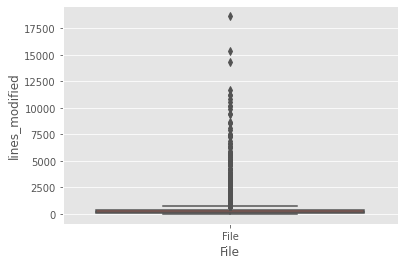

In [44]:
df_boxplot_lm = generate_box_plot_lines_modified(df_fc_ml)

In [45]:
lm_q1, lm_q2, lm_q3, lm_q4 = get_quartiles_lines_modified(df_boxplot_lm)
print(f'Quartis da Linhas Modificadas Q1: {lm_q1}, Q2: {lm_q2}, Q3: {lm_q3}, Q4: {lm_q4}')

Quartis da Linhas Modificadas Q1: [72.], Q2: [143.], Q3: [330.], Q4: [18622.]


## Resultados das Análises do Promocity

In [46]:
# Lista os arquivos com maior frequência de commits e mais linhas modificadas ao longo do tempo
df_fc_ml.query("Frequency >= 9 and lines_modified >= 330")

,File,Frequency,lines_modified
0,KafkaETLContext.java,17,730
9,DataGenerator.java,11,376
13,KafkaOutputFormat.java,14,643
16,ConsumerConnector.java,17,489
19,Consumer.java,51,973
...,...,...,...
3891,MetadataVersion.java,13,561
3893,MetadataVersionTest.java,11,701
3900,DefaultStateUpdater.java,24,1300
3901,DefaultStateUpdaterTest.java,24,3091


In [77]:
df_fc_ml_query = df_fc_ml.query("Frequency >= 9 and lines_modified >= 330")
df_fc_ml_query

,File,Frequency,lines_modified
0,KafkaETLContext.java,17,730
9,DataGenerator.java,11,376
13,KafkaOutputFormat.java,14,643
16,ConsumerConnector.java,17,489
19,Consumer.java,51,973
...,...,...,...
3891,MetadataVersion.java,13,561
3893,MetadataVersionTest.java,11,701
3900,DefaultStateUpdater.java,24,1300
3901,DefaultStateUpdaterTest.java,24,3091


In [78]:
df_fc_ml_query.to_csv('kafka_df_fc_ml_query.txt')

In [47]:
df_arquivos_criticos = df_fc_ml.query("Frequency >= 9 and lines_modified >= 330")

qtd_arquivos_criticos = df_arquivos_criticos.shape[0]
qtd_arquivos_java = df_fc_ml.shape[0]

print(f'Qtd arquivos críticos: {qtd_arquivos_criticos}, Total de Arquivos .java {qtd_arquivos_java}')
print(f'{round(qtd_arquivos_criticos/qtd_arquivos_java, 2)*100}% dos arquivos .java são críticos')

total_linhas_modificadas = sum(df_fc_ml['lines_modified'])
linhas_modificadas_arquivos_criticos = sum(df_arquivos_criticos['lines_modified'])

print(f'Qtd de linhas modificadas pelos arquivos críticos: {linhas_modificadas_arquivos_criticos}, Total de linhas de código alteradas ao longo do tempo: {total_linhas_modificadas}')
print(f'{round(linhas_modificadas_arquivos_criticos/total_linhas_modificadas, 2)*100}% do esforço de modificação é com arquivos críticos')

Qtd arquivos críticos: 791, Total de Arquivos .java 4119
19.0% dos arquivos .java são críticos
Qtd de linhas modificadas pelos arquivos críticos: 1208712, Total de linhas de código alteradas ao longo do tempo: 1725002
70.0% do esforço de modificação é com arquivos críticos


## Summary 

In [48]:
qaj = [qtd_arquivos_java]
laaj = [total_linhas_modificadas]
qac = [qtd_arquivos_criticos]
pac = [round(qtd_arquivos_criticos/qtd_arquivos_java,2)*100]
laac = [linhas_modificadas_arquivos_criticos]
plaac = [round(linhas_modificadas_arquivos_criticos/total_linhas_modificadas, 2)*100]

dict_ = {'Repository': [repositorio1], 'qaj': qaj, 'qac': qac, 'laaj': laaj, 'laac': laac, 'pac': pac, 'plaac': plaac}
pd.DataFrame.from_dict(dict_)

,Repository,qaj,qac,laaj,laac,pac,plaac
0,kafka,4119,791,1725002,1208712,19.0,70.0


In [79]:
!ls analisekafka/

kafka_df_fc_ml.csv			kafka_dict_modified_files_promocity.txt
kafka_df_fc_ml_query.txt		kafka_files_and_directories_src.txt
kafka_dict_frequency_files_commits.txt	kafka_files_and_directories.txt
kafka_dict_java_frequency_commits.txt	kafka_list_commits_promocity.txt
kafka_dict_java_lines_modified.txt	kafka_locs_of_files_updated.txt
kafka_dict_lines_modified_in_files.txt	locarquivosjava.txt


In [80]:
!sudo apt install zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
zip is already the newest version (3.0-11build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [81]:
!zip -r mykafka.zip analisekafka/

  adding: analisekafka/ (stored 0%)
  adding: analisekafka/kafka_dict_java_frequency_commits.txt (deflated 78%)
  adding: analisekafka/locarquivosjava.txt (deflated 89%)
  adding: analisekafka/kafka_df_fc_ml.csv (deflated 71%)
  adding: analisekafka/kafka_files_and_directories_src.txt (deflated 93%)
  adding: analisekafka/kafka_files_and_directories.txt (deflated 92%)
  adding: analisekafka/kafka_dict_java_lines_modified.txt (deflated 75%)
  adding: analisekafka/kafka_locs_of_files_updated.txt (deflated 90%)
  adding: analisekafka/kafka_dict_frequency_files_commits.txt (deflated 77%)
  adding: analisekafka/kafka_dict_lines_modified_in_files.txt (deflated 74%)
  adding: analisekafka/kafka_dict_modified_files_promocity.txt (deflated 76%)
  adding: analisekafka/kafka_list_commits_promocity.txt (deflated 95%)
  adding: analisekafka/kafka_df_fc_ml_query.txt (deflated 67%)


In [82]:
!ls -lia

total 956
6291462 drwxr-xr-x  1 root root   4096 Dec 29 17:37 .
6815774 drwxr-xr-x  1 root root   4096 Dec 29 13:37 ..
6947866 drwxr-xr-x  2 root root   4096 Dec 29 17:34 analisekafka
3407879 drwxr-xr-x  4 root root   4096 Dec 20 20:18 .config
6822619 drwxr-xr-x  2 root root   4096 Dec 29 17:05 .ipynb_checkpoints
6816308 drwxr-xr-x 27 root root   4096 Dec 29 13:39 kafka
6822618 -rw-r--r--  1 root root 945056 Dec 29 17:37 mykafka.zip
6291463 drwxr-xr-x  1 root root   4096 Dec 20 20:19 sample_data
6822579 drwxr-xr-x  4 root root   4096 Dec 29 14:21 treinamento


In [83]:
!unzip mykafka.zip

Archive:  mykafka.zip
replace analisekafka/kafka_dict_java_frequency_commits.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: analisekafka/kafka_dict_java_frequency_commits.txt  
replace analisekafka/locarquivosjava.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: analisekafka/locarquivosjava.txt  
  inflating: analisekafka/kafka_df_fc_ml.csv  
  inflating: analisekafka/kafka_files_and_directories_src.txt  
  inflating: analisekafka/kafka_files_and_directories.txt  
  inflating: analisekafka/kafka_dict_java_lines_modified.txt  
  inflating: analisekafka/kafka_locs_of_files_updated.txt  
  inflating: analisekafka/kafka_dict_frequency_files_commits.txt  
  inflating: analisekafka/kafka_dict_lines_modified_in_files.txt  
  inflating: analisekafka/kafka_dict_modified_files_promocity.txt  
  inflating: analisekafka/kafka_list_commits_promocity.txt  
  inflating: analisekafka/kafka_df_fc_ml_query.txt  


In [ ]:
y